In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, HTML # 셀을 넒게 쓰겠다
display(HTML("<style>.container { width:100% !important; }</style>"))

### scikit-learn

In [1]:
import sklearn
sklearn.__version__ # 버전 확인

'1.6.1'

### 분류 모델

In [2]:
from sklearn.datasets import load_iris
#붓꽃 데이터 로드

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris['target_names'] # 종이 3개의 클래스인것을 확인할 수 있음

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
import pandas as pd

df = pd.DataFrame(data=iris['data'], columns=iris['feature_names']) # 딕셔너리를 데이터 프레임으로 변환
df['species'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df2 = df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width',
                       'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'})
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [9]:
#  열 이름 rename

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
set(df['species']) # 종속변수

{0, 1, 2}

In [11]:
set(iris.target)

{np.int64(0), np.int64(1), np.int64(2)}

In [12]:
set(iris.target_names) # 종의 이름 3개 - 3개 클래스 구성되어있음

{np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')}

In [13]:
original_target =[ 'setosa', 'versicolor', 'virginica' ]

mapper = { 0: 'setosa', 1: 'versicolor', 2: 'virginica' }

df['species'] = df['species'].map(mapper)

# 수치형을 범주형 데이터로 변환

In [14]:
set(df['species']) # 012-> 이름3개로 정상 전환되었는지 확인

{'setosa', 'versicolor', 'virginica'}

In [15]:
df.to_csv('iris2.csv', index=False)

In [16]:
df = pd.read_csv('iris2.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
df.shape

(150, 5)

In [18]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

* 분류문제에서 중요하게 분석하여야 할걱은 데이터의 형평성이다
* 주어진 데이터에서 동일하게 데이터가 주어졌느냐 분석

In [19]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

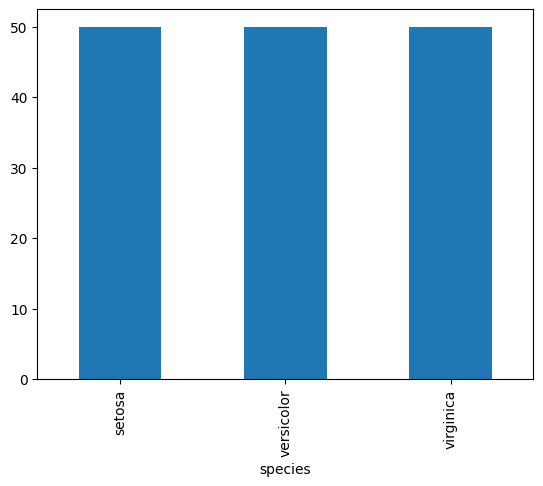

In [21]:
df['species'].value_counts().plot(kind='bar')


# y 클래스가 고르게 분포되어 있음

In [22]:
df.info()   # 결측치 분석

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
df.isna().sum()    # 결측치 데이터 분석

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [24]:
df.head()               #  species 데이터 유형 범주형

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [26]:
original_target =[ 'setosa', 'versicolor', 'virginica' ]

mapper = { 'setosa' : 0, 'versicolor' : 1, 'virginica' : 2 }

df['species'] = df['species'].map(mapper)

set(df['species'])

# 다시 범주형을 수치형으로 매핑-> 모델이 학습하기 좋도록

{0, 1, 2}

In [27]:
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [29]:
import seaborn as sns

In [30]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

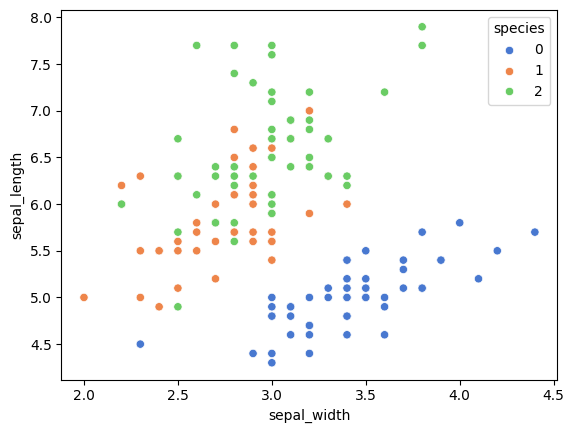

In [31]:
# 산점도 그래프  sepal : 꿏 받침

sns.scatterplot(data=df, x='sepal_width', y='sepal_length', hue='species', palette='muted')

<Axes: xlabel='petal_width', ylabel='petal_length'>

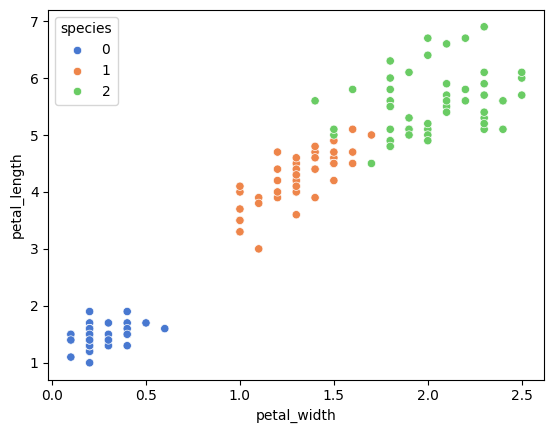

In [33]:
# petal : 꽃잎

sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='species', palette='muted')


In [34]:
#### Data Preparation

In [35]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label = 'species'

X = df[features]
y = df[label]

In [36]:
# train / test split
from sklearn.model_selection  import train_test_split

In [37]:
# stratify label을 균등하게 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 동일하게 보려고 랜덤 스테이트 부여, 8:2로 분리

In [38]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [39]:
X_test.shape, y_test.shape


((30, 4), (30,))

In [40]:
y_train.value_counts()
# 균등하게 분리되지 않아서 다시 분리해야함

species
2    44
0    39
1    37
Name: count, dtype: int64

In [41]:
# stratify label을 균등하게 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, 
                                                    stratify=df['species']) # 타겟값을 균등하게 분리

In [42]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [43]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [44]:
y_train.value_counts()

#train은 모두 균등하게 분리해서 모델에 학습시켜야함

species
0    40
1    40
2    40
Name: count, dtype: int64

#### Modeling

In [45]:
from sklearn.tree import DecisionTreeClassifier as dt

In [46]:
model = dt()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
model.score(X_test, y_test)

# 정확도 96%

0.9666666666666667

#### 분류 문제에서 평가 지표( 혼동 행렬 )
#### accuracy, recall, prec, fall, f1-score, ...

In [48]:
y_pred = model.predict(X_test) # 예측값
sum((y_test == y_pred)) / len(y_test) # 평가 지표 : 정확도임

0.9666666666666667

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # 정확도

0.9666666666666667

In [50]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
idx = int(model.predict([[4.6, 3.2, 1.4, 0.3]]))

C:\Users\asiae\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\asiae\AppData\Local\Temp\ipykernel_14712\2497743832.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx = int(model.predict([[4.6, 3.2, 1.4, 0.3]]))


In [52]:
original_target[idx]

'setosa'

#### 회귀 모델

In [53]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [54]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [55]:
features = ['sepal_width', 'petal_length', 'petal_width', 'species']
label = ['sepal_length']

X = df[features]
y = df[label]

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0,
                                                    stratify=df['species']) # 타겟값을 균등하게 분리

In [57]:
from sklearn.linear_model import LinearRegression as lr # 회귀모델

model = lr()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
model.score(X_test, y_test) # 정확도

# 종을 균등하게 분리하지 않은 것보다 균등하게 분리한게 더 정확도가 떨어짐

0.7565505213644363

In [59]:
import numpy as np
from sklearn.metrics import  mean_squared_error, r2_score

In [60]:
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

0.12216835836774001
0.3495259051454413
0.7565505213644363


In [61]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=10)
score

array([0.90391228, 0.8689451 , 0.84460235, 0.8295    , 0.83594394,
       0.87989595, 0.93906959, 0.86015815, 0.83234554, 0.86017175])

In [62]:
score.mean()

np.float64(0.8654544658210815)

---
## 대용량 데이터 분석

In [63]:
import os
import time
os.getcwd()

'D:\\python-workplace\\ML'

In [64]:
!dir

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: 801F-CC63

 D:\python-workplace\ML 디렉터리

2025-04-24  오전 10:30    <DIR>          .
2025-04-24  오전 09:44    <DIR>          ..
2025-04-24  오전 09:47    <DIR>          .ipynb_checkpoints
2025-04-24  오전 10:30           246,566 1일차.ipynb
2025-04-24  오전 09:45            82,956 2일차.ipynb
2025-04-24  오전 09:45           192,085 3일차.ipynb
2025-04-24  오전 09:45         1,812,619 4일차.ipynb
2025-04-22  오전 10:07    <DIR>          bike-sharing-demand
2025-04-24  오전 10:31             4,009 iris2.csv
               5개 파일           2,338,235 바이트
               4개 디렉터리  978,066,677,760 바이트 남음


In [65]:
import pandas as pd

In [66]:
filepath = "./bike-sharing-demand/" # 데이터 파일 경로 
filename = "서울특별시 공공자전거 이용정보(시간대별)_21.01.csv"
df = pd.read_csv(filepath + filename, encoding='cp949') # 유니코드 형식 아님
df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5
...,...,...,...,...,...,...,...,...,...,...,...,...
718852,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,NaN,~10대,5,916.66,8.66,37335.95,219
718853,2021-01-31,23,3549,3549.건영아파트 앞,단체권,NaN,20대,2,492.87,4.51,19447.10,133
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,NaN,20대,2,348.43,2.91,12569.64,90
718855,2021-01-31,23,131,131. 증산2교,단체권,NaN,20대,2,98.10,0.77,3302.87,20


In [67]:
df.columns

Index(['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량',
       '탄소량', '이동거리', '사용시간'],
      dtype='object')

In [68]:
# 필요한 열 추출
intersted = ['대여일자', '대여시간', '대여구분코드', '성별', '연령대코드']

In [69]:
df = pd.read_csv(filepath + filename, encoding='cp949', 
                 usecols=intersted) # 파일을 읽어올 때 아예 필요 열을 지정해서 가져올수 있음 
df

# 메모리 효율성을 위해 필요 열만 로드

,대여일자,대여시간,대여구분코드,성별,연령대코드
0,2021-01-01,0,정기권,NaN,~10대
1,2021-01-01,0,정기권,NaN,~10대
2,2021-01-01,0,정기권,NaN,~10대
3,2021-01-01,0,정기권,NaN,~10대
4,2021-01-01,0,정기권,NaN,~10대
...,...,...,...,...,...
718852,2021-01-31,23,단체권,NaN,~10대
718853,2021-01-31,23,단체권,NaN,20대
718854,2021-01-31,23,단체권,NaN,20대
718855,2021-01-31,23,단체권,NaN,20대


In [70]:
filepath = "./bike-sharing-demand/"
filename = "서울특별시 공공자전거 이용정보(시간대별)_21.01.csv"
intersted = ['대여일자', '대여시간', '대여구분코드', '성별', '연령대코드']
df = pd.read_csv(filepath + filename, encoding='cp949', usecols=intersted)
df

,대여일자,대여시간,대여구분코드,성별,연령대코드
0,2021-01-01,0,정기권,NaN,~10대
1,2021-01-01,0,정기권,NaN,~10대
2,2021-01-01,0,정기권,NaN,~10대
3,2021-01-01,0,정기권,NaN,~10대
4,2021-01-01,0,정기권,NaN,~10대
...,...,...,...,...,...
718852,2021-01-31,23,단체권,NaN,~10대
718853,2021-01-31,23,단체권,NaN,20대
718854,2021-01-31,23,단체권,NaN,20대
718855,2021-01-31,23,단체권,NaN,20대


In [71]:
from glob import glob 

In [72]:
data_path = './bike-sharing-demand/'

In [73]:
from glob import glob 
data_path = './bike-sharing-demand/'
all_path = glob(data_path + '*.csv') # 해당 파일에 있는 모든 csv 가져옴
len(all_path)

48

In [74]:
all_path

['./bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202401.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202402.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202403.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202404.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202405.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202406.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202407.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202408.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202409.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202410.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202411.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_202412.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_21.01.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_21.02.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_21.03.csv',
 './bike-sharing-demand\\서울특별시 공공자전거 이용정보(시간대별)_21.04.csv',
 './bike-sharing-demand\\서울특

In [75]:
pd.read_csv(all_path[0], encoding='cp949', usecols=['대여일자','대여시간', '대여소번호']	)

#첫번째 파일만 불러옴

,대여일자,대여시간,대여소번호
0,2024-01-01,0,1175
1,2024-01-01,0,669
2,2024-01-01,0,5760
3,2024-01-01,0,1153
4,2024-01-01,0,1265
...,...,...,...
1860879,2024-01-31,23,135
1860880,2024-01-31,23,2102
1860881,2024-01-31,23,1416
1860882,2024-01-31,23,1221


In [76]:
pd.read_csv('./bike-sharing-demand/서울특별시 공공자전거 이용정보(시간대별)_202402.csv', encoding='cp949')

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-02-01,0,4128,4128. 종암초등학교 뒤(새울센스빌),정기권,NaN,~10대,1,37.72,0.37,1614.48,19
1,2024-02-01,0,720,720. 서울강월초등학교 앞,정기권,NaN,~10대,1,10.23,0.10,410.00,1
2,2024-02-01,0,1113,1113. 서남환경공원 버스정류장,정기권,NaN,~10대,1,31.41,0.28,1220.27,8
3,2024-02-01,0,731,731. 서울시 도로환경관리센터,정기권,NaN,20대,1,45.05,0.41,1750.06,15
4,2024-02-01,0,1028,1028. 포레스 주상복합 빌딩,정기권,NaN,20대,1,20.07,0.16,703.87,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1899818,2024-02-29,23,4689,4689. 은평서해그랑블아파트앞,정기권,M,기타,1,42.55,0.38,1652.95,17
1899819,2024-02-29,23,805,805. 문배어린이공원 앞,정기권,M,기타,1,334.53,3.02,12996.43,55
1899820,2024-02-29,23,230,230. 영등포구청역 1번출구,정기권,M,기타,1,30.93,0.24,1027.76,7
1899821,2024-02-29,23,262,262. 영문초등학교 사거리,정기권,M,기타,1,36.75,0.22,928.12,7


In [77]:
# 대용량 파일 핸드링 시 파일 용량에 따른 속도 비교 예시 : 한 파일 불러오는데 걸리는 속도 확인
t0 = time.time()
pd.read_csv(all_path[0], encoding='cp949')
t1 = time.time()

print(t1 - t0)

2.3806405067443848


In [78]:
csv_rows = 1899823
csv_row_per_sec = csv_rows //  (t1 - t0)

print(csv_row_per_sec)

798030.0


In [79]:
all_cols = []
for path in all_path:
    if '.csv' in path:
        print(path)
        cols = list(pd.read_csv(path, encoding='cp949', skiprows=lambda x: x>2).columns)
    else:
        cols = list(pd.read_excel(path, encoding='cp949', skiprows=lambda x: x>2).columns)
    
    all_cols = all_cols = cols

set(all_cols)

./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202401.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202402.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202403.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202404.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202405.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202406.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202407.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202408.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202409.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202410.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202411.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_202412.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_21.01.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_21.02.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_21.03.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_21.04.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_21.05.csv
./bike-sharing-demand\서울특별시 공공자전거 이용정보(시간대별)_21.06.cs

{'대여구분코드',
 '대여소명',
 '대여소번호',
 '대여시간',
 '대여일자',
 '성별',
 '연령대코드',
 '운동량',
 '이동거리(M)',
 '이용건수',
 '이용시간(분)',
 '탄소량'}

In [81]:
all_cols[:12]

['대여일자',
 '대여시간',
 '대여소번호',
 '대여소명',
 '대여구분코드',
 '성별',
 '연령대코드',
 '이용건수',
 '운동량',
 '탄소량',
 '이동거리(M)',
 '이용시간(분)']

In [82]:
import warnings
warnings.filterwarnings(action='ignore')

In [83]:
# '대여소명', '대여구분코드', '이용건수', '운동량',  '탄소량', '이동거리(M)', '이용시간(분)'
#: 데이터 전체가 서울 지역의 데이터 이므로 필요 없음

# ['대여일자', '대여시간', '대여구분코드', '성별', '연령대코드' ]   #  필요 컬럼만 사용

reset_col = all_cols[:12]
interested = ['대여일자', '대여시간', '대여구분코드', '성별', '연령대코드' ] 

all_df = pd.DataFrame()

for path in all_path:
    if '.csv' in path:
        single = pd.read_csv(path, encoding='cp949', usecols=interested)
    else:
        single = pd.read_exce(path)
    #single.columns = reset_col
    all_df = pd.concat([all_df, single[interested]]) # 한파일 수정한다음 합산
    print(all_df.shape)

    del single   # 초기화 : 메모리 효율성

(1860884, 5)
(3760707, 5)
(6646264, 5)
(10771151, 5)
(15038600, 5)
(19369651, 5)
(22743869, 5)
(26368058, 5)
(30174064, 5)
(34371870, 5)
(37550799, 5)
(39676932, 5)
(40395789, 5)
(41504441, 5)
(43298711, 5)
(45899156, 5)
(48179189, 5)
(50795787, 5)
(53304914, 5)
(55766580, 5)
(58707819, 5)
(61387584, 5)
(63578895, 5)
(65098746, 5)
(66438715, 5)
(67710091, 5)
(69928727, 5)
(73433451, 5)
(77722674, 5)
(81427002, 5)
(85029078, 5)
(88216649, 5)
(92317333, 5)
(96220241, 5)
(99620264, 5)
(101259233, 5)
(102732664, 5)
(104794118, 5)
(108255875, 5)
(111856922, 5)
(116160021, 5)
(120482788, 5)
(123991516, 5)
(127521108, 5)
(131535450, 5)
(136198216, 5)
(139297989, 5)
(141252948, 5)


In [91]:
all_df.to_csv('test1_modify.csv', index=False)
# 한 파일로 저장

In [92]:
import pandas as pd

In [87]:
all_df = pd.read_csv('test1_modify.csv')
all_df.columns

Index(['대여일자', '대여시간', '대여구분코드', '성별', '연령대코드'], dtype='object')

In [93]:
all_df.shape

(141252948, 5)

In [94]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141252948 entries, 0 to 141252947
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   대여일자    object
 1   대여시간    int64 
 2   대여구분코드  object
 3   성별      object
 4   연령대코드   object
dtypes: int64(1), object(4)
memory usage: 5.3+ GB
